# Lecture 14

- Moments continued
- KDE on a dataset
- Statistical Inference
- Hypothesis tests


## Feedback Evaluation Form

[Fill this out!](https://forms.gle/ficQzQpWbfZzJVbb6)
Note: you need to be signed into Chrome or web browser through your UF account. The form, however, is anonymous.

## Last class

* We learned about different **moments** of PDFs.

<div class="alert alert-info">
    <b>Central Moments</b>
    
The **central moments** of a random variable (or of its distribution) are *expected values of mean-centered powers* or related functions of the random variable.

The $n$-th central moment of RV $X$ is $E[(X - \mu_X)^n]$, in general, $E[(X - E[X])^n]$.
    
If $X$ is a **continuous** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \int_x (t-\mu_X)^n f_X(t)~dt
\end{align*}
    
If $X$ is a **discrete** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \sum_x (x-\mu_X)^n p_X(x)
\end{align*}
</div>

* Moments of a random variable are expected values of the random variable raised to some power.

* For a *central moment*, the mean is subtracted from the random variable before it is raised to a power.

Because different powers spread the values of the random variable in different ways, **moments can provide additional information about a random variable other than the mean value**:

In mathematics, a moment is a specific quantitative measure of the shape of a function. The most important ones are: 

1. **Mean**, the 1st moment

2. **Variance**, the 2nd central moment 

3. **Skewness**, the 3rd central moment 

4. **kurtosis**, the 4th central moment

* We learnt how to think about **decision-making** and MAP in the case of distributions.

* We learnt about **KDE** (kernel density estimation)

## Today

* We will learn about how to infer an entire PDF from data using KDE

* We will learn about Statistical Inference - how do we directly estimate the parameters, here, the moments of a PDF

* We will learn about hypothesis tests: how do we prove or disprove hypotheses when faced with data, that go beyond the difference in means / medians.

___

In [1]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('bmh')

___

<div class="alert alert-info">
    <b>Central Moments</b>
    
The **central moments** of a random variable (or of its distribution) are *expected values of mean-centered powers* or related functions of the random variable.

The $n$-th central moment of RV $X$ is $E[(X - \mu_X)^n]$, in general, $E[(X - E[X])^n]$.
    
If $X$ is a **continuous** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \int_x (t-\mu_X)^n f_X(t)~dt
\end{align*}
    
If $X$ is a **discrete** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \sum_x (x-\mu_X)^n p_X(x)
\end{align*}
</div>

* Moments of a random variable are expected values of the random variable raised to some power.

* For a *central moment*, the mean is subtracted from the random variable before it is raised to a power.

Because different powers spread the values of the random variable in different ways, **moments can provide additional information about a random variable other than the mean value**:

In mathematics, a moment is a specific quantitative measure of the shape of a function. The most important ones are: 

1. **Mean**, the 1st moment

2. **Variance**, the 2nd central moment 

3. **Skewness**, the 3rd central moment 

4. **kurtosis**, the 4th central moment

___

We saw that we can compute the most common moments of a random variable using the ```stats``` module, but let us go through what these moments actually describe: the shape of the distribution.

Let's go over what the moments describe, on the whiteboard.

___

# Kernel Density Estimation (KDE)

**Kernel density estimation (KDE)** is a non-parametric estimator of the probability density function (PDF) of a random variable. It is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. It uses a mixture consisting of a Kernel component centered at each data point.

* A density estimator is an algorithm which seeks to model the probability distribution that generated a data set. For one dimensional data, you are already familiar with one simple density estimator: the histogram. A histogram divides the data into discrete bins, counts the number of points that fall in each bin, and then visualizes the results in an intuitive manner.

* One of the issues with using a *histogram* as a density estimator is that the choice of bin size and location can lead to representations that have qualitatively different features. 

* In order to smooth them out, we might decide to replace the blocks at each location with a smooth function, like a Gaussian. 

* Look at Lecture13-supp.ipynb for more information on KDE!

In [90]:
G=stats.norm()
Gvals=G.rvs(size=100)
G25=stats.norm.rvs(size=25)

<IPython.core.display.Javascript object>


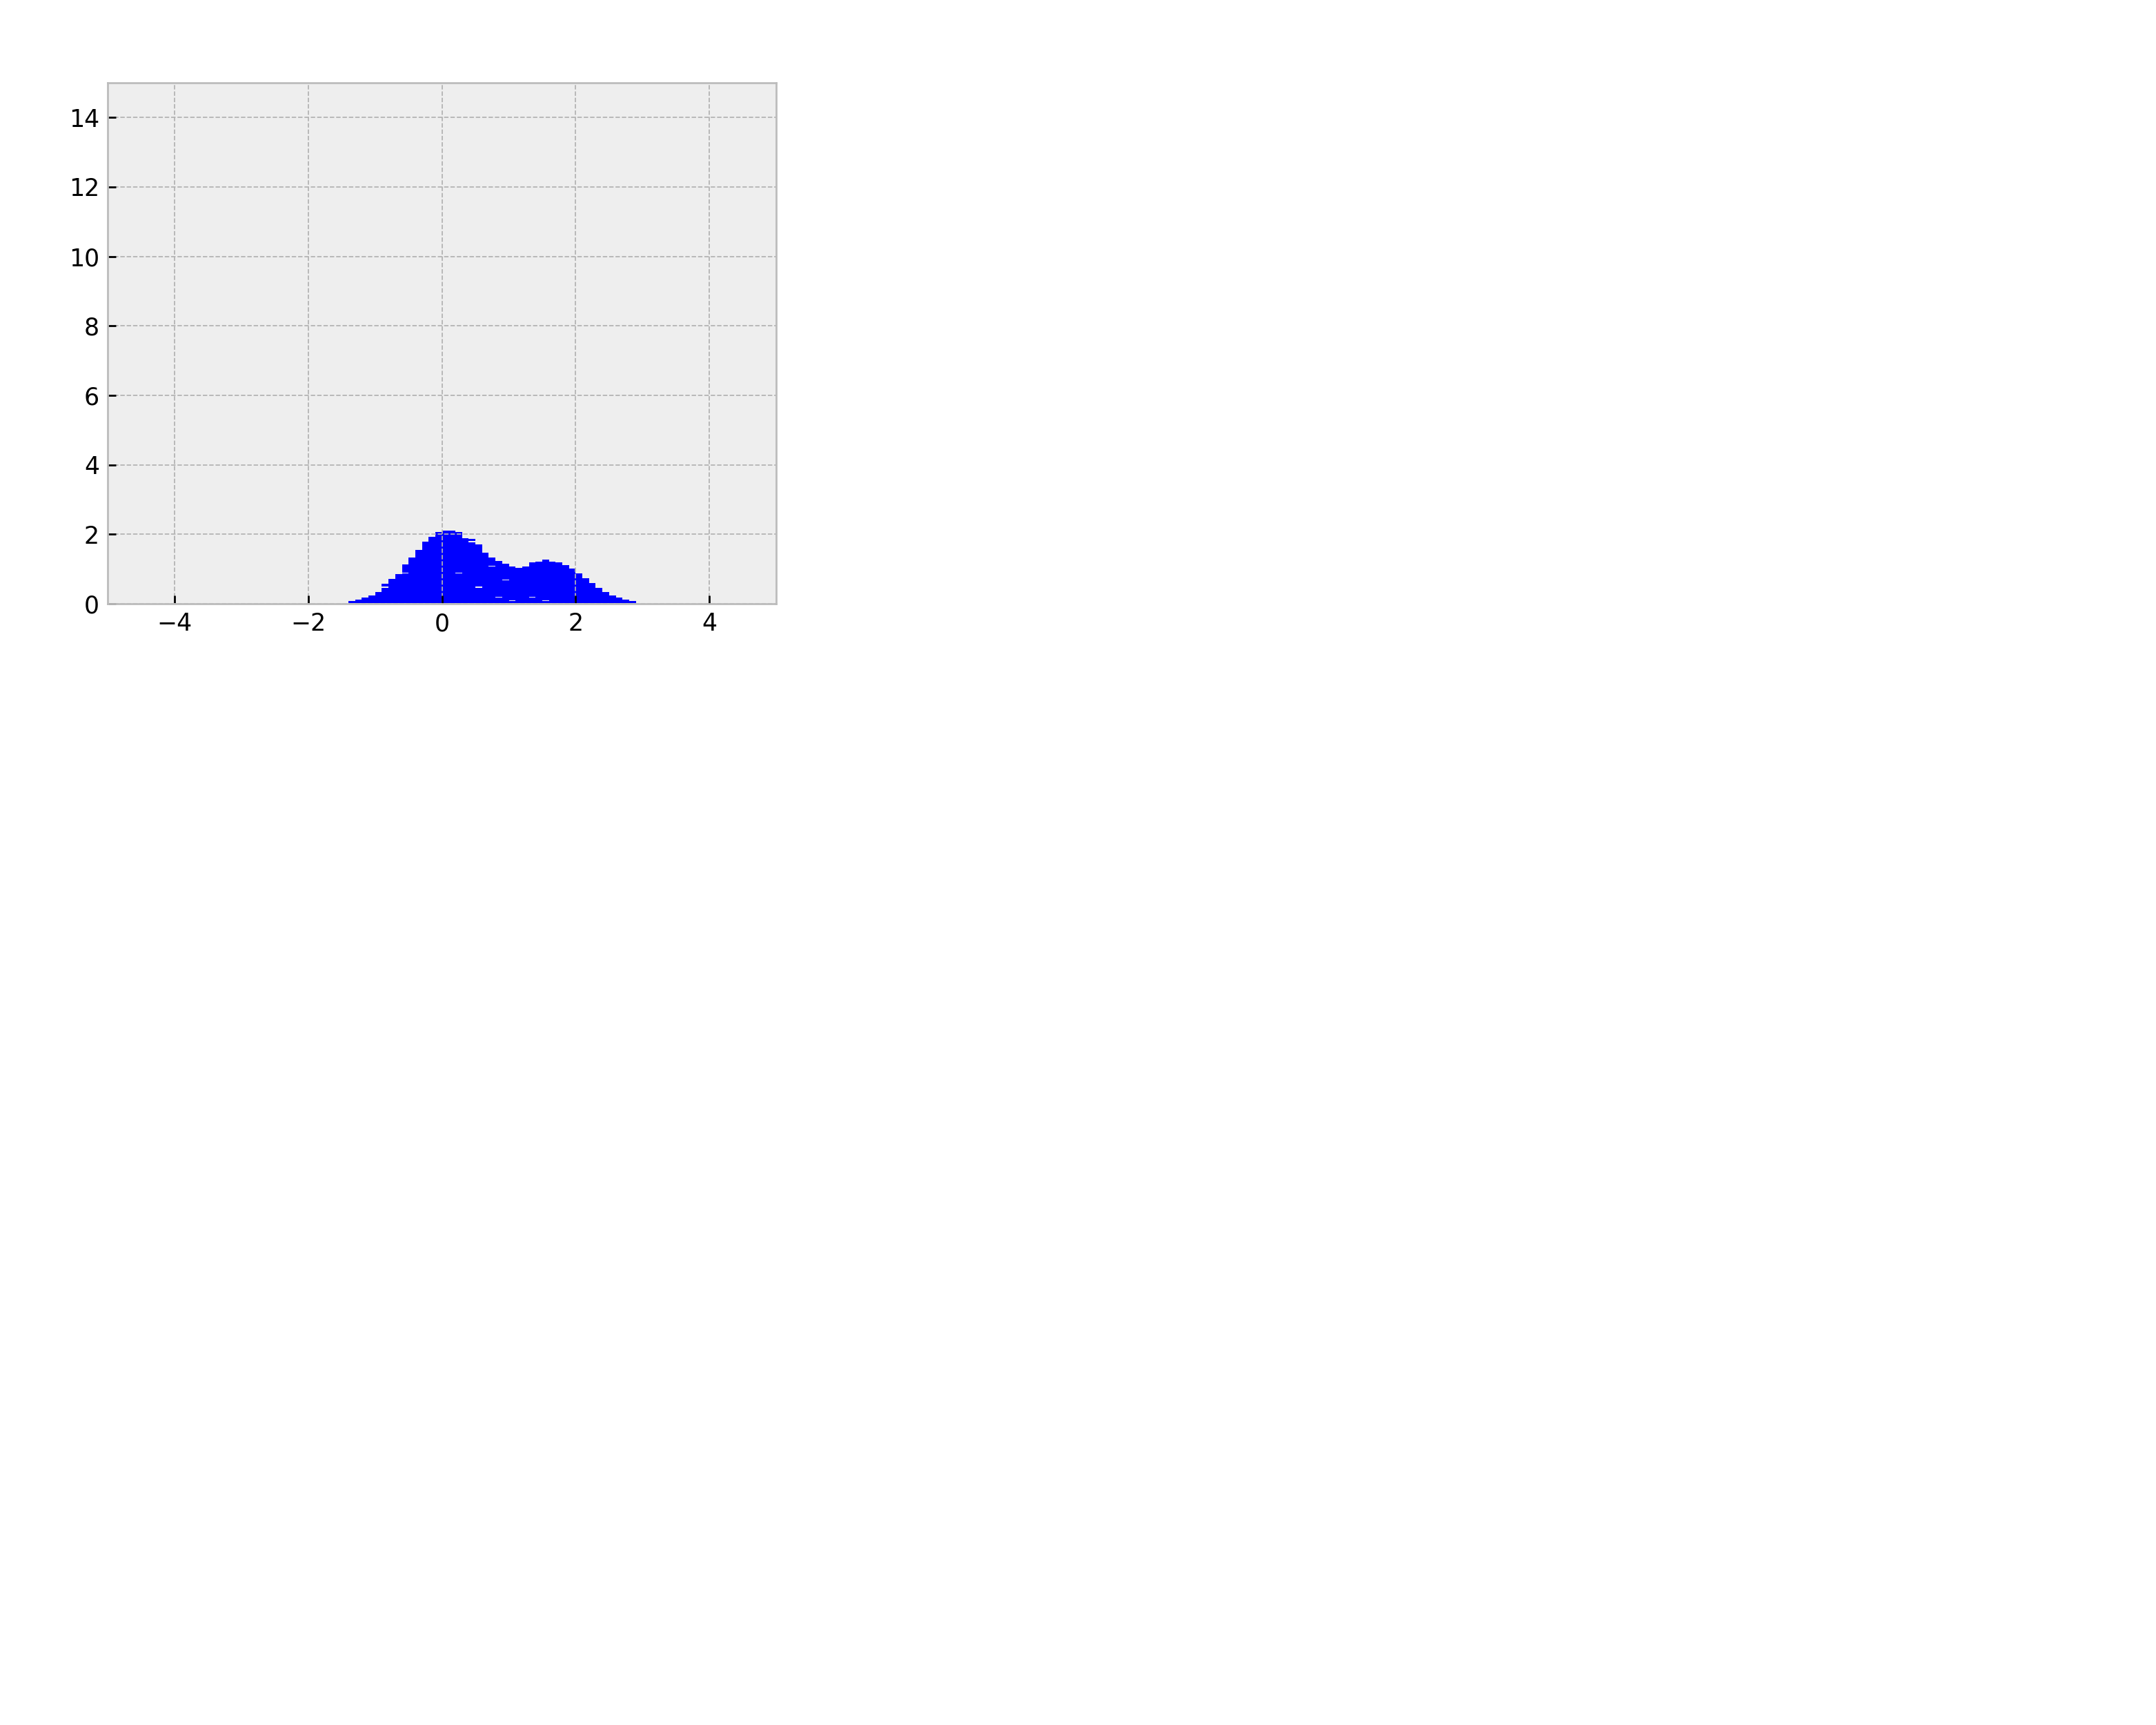

In [91]:
from matplotlib import animation
#This will do an animated histogram
%matplotlib notebook

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 4)

ax = plt.axes(xlim=(-5, 5), ylim=(0, 15))
blocks={}
floors={}
patchesPerBlock=25

def init():
    blocks['activeBlock']=0
    for num,var in enumerate(G25):
        center=round(var,1)
        blocks[num]=[]
        for i in range(patchesPerBlock):
            binedge=round(center+(i-patchesPerBlock//2)*0.1,1)
            patch = plt.Rectangle((binedge, 16), 0.1,
                                  stats.norm.pdf((i-patchesPerBlock//2)*0.1,scale=0.5)*1.5, fc='b')
            ax.add_patch(patch)
            blocks[num]+=[patch]
            floors[binedge]=0.01
        #print(num,var, patches)


    return []

def animatePatch(i, patch,update):
    return patch,

def animate(i, blocks):
    activeBlock=blocks['activeBlock']
    #print(activeBlock,blocks)
    numFloored=0
    for patch in blocks[activeBlock]:
        x,y=patch.xy
        if y<=floors[x]:
            #floors[x]=floors[x]+0.6
            #print("floors[",x,"]=",floors[x])
            patch.xy=(x,floors[x])
            numFloored+=1
        else:
            patch.xy=(x,y-0.2)
    if numFloored>=patchesPerBlock:
        for patch in blocks[activeBlock]:
            x,y=patch.xy
            floors[x]=round(floors[x]+patch.get_height(),1)
        blocks['activeBlock']=activeBlock+1
        activeBlock+=1
        if activeBlock not in blocks.keys():
            return []
        #print(patches[activePatch])
    for i in blocks:
        #print(patchnum)
        if i!='activeBlock':
            for patch in blocks[i]:
                animatePatch(i, patch,activeBlock==i)

    return[]

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=100*len(G25), 
                               fargs=(blocks,),
                               interval=5,
                               blit=True,repeat=False)
anim
plt.show()

Here is the same type of graph created with a wider, more finely quantized Gaussian shape and 100 Gaussian random variables:

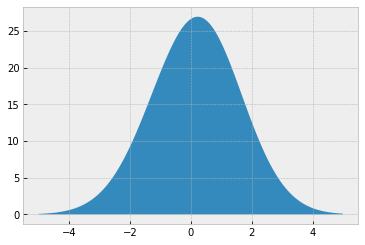

In [92]:
%matplotlib inline
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Gvals:
    ## Create new Gaussian RVs centered on the observation
    Gi=stats.norm(xi) 
    ## Use the density of the RV as the shape:
    density+=Gi.pdf(x) 
    
plt.fill_between(x, density);

**Magic!** This looks a lot like our density, even though we only had 100 observations!

The shape we use to build this new density estimate is called a **"kernel"**.

This approach is called **kernel density estimation (KDE)**.



* The free parameter of kernel density estimation is the **kernel** function, which specifies the shape of the distribution placed at each point, and the kernel **bandwidth**, which controls the size of the kernel at each point. In practice, there are many kernels you might use for a kernel density estimation: in particular, the Scikit-Learn KDE implementation supports six kernel functions, which you can read about in Scikit-Learn's [Density Estimation documentation](https://scikit-learn.org/stable/modules/density.html).

## Applying KDE to a dataset

In [11]:
df = pd.read_csv('firearms-urban.csv')

df

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0
5,CO,12.2,86.2
6,CT,5.0,88.0
7,DE,11.1,83.3
8,FL,11.5,91.2
9,GA,13.7,75.1


In [ ]:
N=50


#COMPLETE IN CLASS

plt.legend()
plt.title(str(N)+' Random Samples \nGenerated from the Gaussian KDE PDF');

___

# Statistical Inference

We have developed the Bayesian approach to inference, where unknown parameters are modeled as random variables. In all cases we worked within a single, fully-specified probabilistic model, and we based most of our derivations and calculation on judicious application of Bayes's rule.

By contrast, we can adopt a fundamentally different philosophy: we can view the unknown probabilistic parameter $\theta$ of the probability function as a *deterministic* quantity (not random) but, nevertheless, unknown quantity.

* The observational data $X=\{x_i\}_{i=1}^N$ is random and its distribution $p_X(x;\theta)$ (if $X$ is discrete) or $f_X(x;\theta)$ (if $X$ is continuous) depends on the value of $\theta$ (the parameters of the distribution). 

* Thus, instead of working with a single probabilistic model, we will be dealing simultaneously with *multiple candidate (probabilistic) models*, one model for each possible value of $\theta$.

* In this context, a *good* hypothesis testing or estimation procedure will be one that possesses certain desirable properties *under every candidate model*.

## Classical Parameter Estimation

Given observations $X=\{x_1,x_2,\dots,x_N\}$, an **estimator** is a random variable of the form $\hat{\theta} = g(X)$, for some function $g$. Note that since the distribution of $X$ depends on $\theta$, the same is true for the distribution of $\hat{\theta}$.

### Some Terminology

Let $\hat{\theta}$ be an **estimator** of an unknown parameter $\theta$, that is, a function of $N$ observations $X=\{x_i\}_{i=1}^N$ whose distribution depends on $\theta$.

<div class="alert alert-info">
    <b>Error of Estimator</b>

The **estimated error** is denoted by $\epsilon_{\theta}(\hat{\theta})$, is defined as
    
\begin{align*}
\epsilon_{\theta} = \hat{\theta} - \theta
\end{align*}
</div>

<div class="alert alert-info">
    <b>Bias of Estimator</b>

The **bias** of an estimator, denoted by $b_{\theta}(\hat{\theta})$ is defined as
    
\begin{align*}
b_{\theta}(\hat{\theta}) = E[\hat{\theta}] - \theta
\end{align*}
</div>

<div class="alert alert-info">
    <b>Variance of Estimator</b>

The **variance** of an estimator, denoted by $\operatorname{Var}_{\theta}[\hat{\theta}]$ is defined as
    
\begin{align*}
\operatorname{Var}_{\theta}[\hat{\theta}] = E\left[\left(\hat{\theta} -E[\hat{\theta}]\right)^2\right]
\end{align*}
</div>

<div class="alert alert-info">
    <b>Mean-Square Error of Estimator</b>

The **Mean-Square Error** of an estimator, denoted by $E\left[(\hat{\theta}-\theta)^2\right]$ is defined as
    
\begin{align*}
E\left[(\hat{\theta}-\theta)^2\right] = b^2_{\theta}\left[\hat{\theta}\right] + \operatorname{Var}_{\theta}[\hat{\theta}]
\end{align*}
</div>

The expected value, the variance, and the bias of $\hat{\theta}$ depend on $\theta$, while the estimation error depends in addition on the observations $x_1,\cdots, x_N$.

<div class="alert alert-info">
    <b>Unbiased Estimator</b>

We call $\hat{\theta}$ **unbiased** if $E[\hat{\theta}] = \theta$, for every possible value of $\theta$.
</div>

<div class="alert alert-info">
    <b>Asymptotically Unbiased Estimator</b>

We call $\hat{\theta}$ **asymptotically unbiased** if $\lim_{N\rightarrow\infty} E[\hat{\theta}] = \theta$, for every possible value of $\theta$.
</div>

### The Bias-Variance Trade-Off

Besides the bias $b_{\theta}(\hat{\theta})$, we are usually interested in the size of the estimation error. This is captured by the **mean squared error**, $E\left[(\hat{\theta}-\theta)^2\right]$, which is related to the bias and the variance of $\hat{\theta}$ according to the following formula:

\begin{align*}
E\left[(\hat{\theta}-\theta)^2\right] = b^2_{\theta}\left[\hat{\theta}\right] + \operatorname{Var}_{\theta}[\hat{\theta}]
\end{align*}

This formula is important because in many statistical problems there is a **trade-off** between the two terms on the right-hand-side. Often a reduction in the variance is accompanied by an increase in the bias. Of course, a good estimator
is one that manages to keep both terms small. This is also known as **The Bias-Variance Trade-off**.

___

# Properties of Sum of Independent Gaussian RVs

Suppose now that we have two independent data samples, $X=\{x_1,x_2,\cdots,x_N\}$ and $Y=\{y_1,y_2,\cdots,y_N\}$, that we think can be modeled as coming from Gaussian distributions.

* If we observe a difference in the sample means for the two data sets, how can we determine analytically if the (true) means are different?

* Let's assume that distributions for the two data sets have a common variance and we know the variance, $\sigma^2$.

We need to know a few more facts about **sums of independent Gaussian random variables**:

1. If $X$ and $Y$ are independent RVs, then

\begin{align*}
Var[X +Y] = Var[X]+Var[Y]
\end{align*}

2. If $X$ and $Y$ are independent Gaussian random variables such that

\begin{align*}
X \sim \text{Gaussian}(\mu_X, \sigma_X^2)
\end{align*}

and
\begin{align*}
Y \sim \text{Gaussian}(\mu_Y, \sigma_Y^2)
\end{align*}

Then
\begin{align*}
Z = X+Y \sim \text{Gaussian}(\mu_Z, \sigma_Z^2)
\end{align*}

By linearity $\mu_z = \mu_X + \mu_Y$, and by the previous property $\sigma_Z^2 = \sigma_X^2 + \sigma_Y^2$.

3. If $Z$ is a Gaussian random variable, $aZ + b$ is also a Gaussian random variable.

___

Let's start by considering the statistic of a single sample mean,
    
\begin{align*}
\hat{\mu}_X = \frac{1}{N} \sum_{i=1}^N X_i
\end{align*}

By the properties above, we can see:

* $\hat{\mu}_X$ is a Gaussian random variable

* The mean of $\hat{\mu}_X$ is $E[\hat{\mu}_X] = \mu_X$

* The variance of $\hat{\mu}_X$ is 

\begin{align*}
Var\left[\frac{1}{N}\sum_{i=1}^N X_i\right] &= \frac{1}{N^2} Var\left[\sum_{i=1}^N X_i\right]\\
&= \frac{1}{N^2} \sum_{i=1}^N Var\left[X_i\right]\\
&= \frac{1}{N^2} \sum_{i=1}^N \sigma_X^2\\
&= \frac{\sigma_X^2}{N}
\end{align*}
    
Note that the variance of the sample mean decreases linearly as the sample size increases. 

**This can be used to show that the sample mean converges to the true mean if the variance of the original random variable is finite.**

___

# <font color=blue>Z-Test</font>: Binary Hypothesis Tests involving Sample Mean *with Known and Equal Variances*

Suppose we have two populations characterized by RVs $X$ and $Y$, and the following samples $\{x_i\}_{i=1}^M$ and $\{y_j\}_{j=1}^N$, where $x_i$ and $y_j$ are observed values of RVs $X$ and $Y$, which are assumed to have common variance $\sigma^2$.

* Let the averages of the data samples be

\begin{align*}
\bar{x} = \frac{1}{M}\sum_{i=1}^{M} x_i \text{, and } \bar{y} = \frac{1}{N}\sum_{j=1}^{N} y_j
\end{align*}

and denote the true means of the distributions $\mu_X$ and $\mu_Y$, respectively.

* Note that if the number of samples from each population is relatively large ($\geq 10$), then even if the original population does not have a Gaussian distribution, the averages will still be approximately Gaussian - Central Limit Theorem (CLT)

**If $\bar{x} \neq \bar{y}$, how can we conduct a binary hypothesis test on whether the two populations have different means?**

* What is the null hypothesis?

    * $H_0$: **the means are the same, $\mu_X = \mu_Y$**
    * $H_1$: **the means are not the same, $\mu_X \neq \mu_Y$**
    
* We will conduct this test only using the sample observations $\{x_i\}_{i=1}^M$ and $\{y_j\}_{j=1}^N$

Under the null hypothesis, we compute the difference in the sample averages and determine the probability that a difference that large would be observed under the null hypothesis.

Thus, our test statistic is the difference in averages

\begin{align*}
t = \bar{x} - \bar{y}
\end{align*}

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from $X$ and $Y$ RVs, respectively. We can view $t$ as an instantiation of

\begin{align*}
T = \hat{\mu}_X - \hat{\mu}_Y
\end{align*}

If $\mu_X = \mu_Y = \mu$, then $E[\hat{\mu}_X] = E[\hat{\mu}_Y] = \mu$. Then, by linearity

\begin{align*}
\mu_T = E[T] = E[\hat{\mu}_X - \hat{\mu}_Y] = E[\hat{\mu}_X] - E[\hat{\mu}_Y] = \mu - \mu = 0
\end{align*}

* We can compute the variance of $T$ under the null hypothesis as:

\begin{align*}
\sigma_T^2 &= Var[T] \\
&= Var[\hat{\mu}_X - \hat{\mu}_Y] \\
&= Var[\hat{\mu}_X + (-\hat{\mu}_Y)] \\
&= Var[\hat{\mu}_X] + Var[-\hat{\mu}_Y] \\
&= Var[\hat{\mu}_X] + (-1)^2 Var[\hat{\mu}_Y] \\
&= \frac{\sigma^2}{M} + \frac{\sigma^2}{N} \\
& = \left( \frac{1}{M} + \frac{1}{N} \right) \sigma^2
\end{align*}

Finally, we can compute the probability of observing a difference in means as large as $t = \bar{x} - \bar{y}$. For convenience of discussion, assume $\bar{x} > \bar{y}$:

Let $t$ be the observed difference $\bar{x}-\bar{y} > 0$.

Hypothesis test:

* What is $P(\text{see result as extreme under }H_0)$

    * One-sided Hypothesis test: 
    
\begin{align*}
P(T \geq t | H_0) = Q\left(\frac{t-\mu_T}{\sigma_T}\right) = Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right)
\end{align*}
    
    * Two-sided Hypothesis test:
    
\begin{align*}
P(|T| \geq t | H_0) = 2 Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right)
\end{align*}

<div class="alert alert-info">
    <b>Z-Test</b>
    
A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. Z-tests test the mean of a distribution.

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from two RVs $X$ and $Y$, respectively, with common variance $\sigma^2$. We can build the statistic:

\begin{align*}
T = \hat{\mu}_X - \hat{\mu}_Y
\end{align*}

where $E[T] = 0$, $\operatorname{Var}[X] = \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)$ and 

\begin{align*}
T \sim G\left(0, \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)\right)
\end{align*}

</div>

**<font color=blue>Example 1</font> The city of Gainesville claims the mean commute time on SW 24th Ave from I-75 to UF is 23 minutes with a variance of 50. You traveled that route 10 times over the last two weeks and had an average commute time of 27 minutes. Conduct a hypothesis test to determine whether the City of Gainesville’s model is reasonable. Reject the null hypothesis if $p < 0.01$.**

1. What is the null hypothesis? Define the density under $H_0$.

<!-- Null Hypothesis: city's model is correct.

\begin{align*}
X_i \sim \text{Gaussian}(23, \sigma_X^2 = 50)
\end{align*} -->

2. Compute the sample mean, $\hat{\mu}$. Compute the bias and variance of the estimator $\hat{\mu}$.

<!-- \begin{align*}
\hat{\mu} = \frac{1}{10} \sum_{i=1}^{10} X_i\text{, (sample mean estimator)}
\end{align*}

\begin{align*}
E[\hat{\mu}] = 23 = \mu
\end{align*}

\begin{align*}
Var[\hat{\mu}] = \sigma^2_{\mu_X} = \frac{\sigma_X^2}{10} = \frac{50}{10} = 5
\end{align*} -->

3. What is the probability that observe a result this extreme, i.e., $P(\hat{\mu} \geq 27)$? Compute the one-sided and the two-sided hypothesis test probabilities.

<!-- One-sided hypothesis test:

\begin{align*}
P(\hat{\mu} \geq 27) = P\left(\frac{\hat{\mu} - 23}{\sigma_{\mu_X}} \geq \frac{27 - 23}{\sigma_{\mu_X}}\right) = P\left( Z \geq \frac{27-23}{\sqrt{5}} \right) = Q\left(\frac{27-23}{\sqrt{5}}\right) = Q\left(\frac{4}{\sqrt{5}}\right)
\end{align*}

Two-sided hypothesis test:

\begin{align*}
P(|\hat{\mu}| \geq 27) = 2Q\left(\frac{4}{\sqrt{5}}\right)
\end{align*} -->

**Conclusion:** 

<!-- We cannot reject the null hypothesis because p>0.01. The Gainesville's model is correct. -->

___

# <font color=blue>T-Test</font>: Binary Hypothesis Tests with *Unknown Variance*

In many cases, the variance(s) of the underlying distributions are not known and must be estimated from the data.

In this case, the underlying distribution is even more spread out from the mean than the Gaussian distribution. More of the probability is in the tails.

The first step is to determine how to estimate the variance. Any ideas?

* Let's generate 10 samples from a Gaussian RV with mean 10 and variance 100. 
    * Compute the sample variance. 
    * Let's do this for 10,000 simulation steps, during each of which we redraw the 10 random samples and estimate the sample mean and variance. 
    * Using the average of the sample variance over the 10000 simulations as an estimator of the true variance, what do you observe?

In [ ]:
num_sims=10_000
num_samples=10

sum_mux=0
sum_varx=0
sum_varx_biased=0

for sim in range(num_sims):
    # draw random samples from a G(10,100)
    
    # compute the sample mean and add it to sum_mux
    
    
    
    # compute the biased estimator of the variance and add it to sum_varx
    
    
    
    # compute the unbiased estimator of the variance and add it to sum_varx
    
    
    
print('The smaple average is ~-=',   ) 
print('The unbiased variance is ~=',  ) 
print('The biased variance is ~=',  ) 

If we use our *unbiased* estimator for the variance, then the distribution of

\begin{align*}
\frac{\hat{\mu}-\mu}{S_{N-1}/\sqrt{N}}
\end{align*}

has a **Student’s $t$-distribution with $N-1$ degrees of freedom (dof)**.

* The density and distribution functions for the **Student's $t$-distribution** are shown on its [Wikipedia page](https://en.wikipedia.org/wiki/Student's_t-distribution).

* Unlike the Gaussian distribution, the distribution function for Student’s t-distribution is in closed form for several values of $\nu$ (degrees of freedom or dof).

* Let's compare the density function of a Normal RV with the Student's $t$ RV with different degrees of freedom.
     * Why does it behave this way?

**<font color=blue>Example 1</font> Analytical Test on Difference of Means (T-Test)**

Conduct an **analytical** binary hypothesis test on whether urban and rural populations have different firearms mortality rates.

Recall the data "firearms-urban.csv" where the columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states. Although this data is 2010, it should be sufficiently accurate for our purposes.

In [ ]:
# Use the STATE column as the index



In [ ]:
# Plot the data
# Highlight the point for Florida

plt.scatter(df['Percent Urban'],df['RATE-2014'])
plt.scatter(df.loc['FL']['Percent Urban'],df.loc['FL']['RATE-2014'],marker='*',c='r')
plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

In [ ]:
# Let's consider:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

plt.figure(figsize=(8,5))



plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

In [ ]:
# Let's the firearm mortality rate for 2014 where:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

# Extract data


# Estimate Density using KDE



In [ ]:
plt.figure(figsize=(8,5))
x = np.linspace(0,22,1000)



plt.legend()
plt.xlabel('Firearms Mortality Rate');

* Let's construct a **two-sided binary hypothesis test** using analytical techniques and determine the probability of such a large difference in means under the null hypothesis.

The data comes from a single distribution, which implies same means and same variances.

So, we will use the **T-random variable** to model this. We know: mean of $T$ is 0, and we need to calculate the variance from the data.

In [ ]:
# Sample unbiased estimator for the variance



In [ ]:
# Alternative



In [ ]:
# We need to calculate the variance of the difference of sample mean estimators




In [ ]:
# Last parameter of T: degrees of freedom




Calculate the t-distribution and perform the test

In [ ]:



# We set the variance of the T random variable here

In [ ]:
# 1-sided test




In [ ]:
# 2-sided test




In [ ]:
# other 1-sided




**Conclusion:** 

<!-- The p-value is much smaller than $\alpha=0.01$, therefore we reject the null hypothesis that the means of the populations for urban firearms mortality rate and rural firearms mortality rate are NOT the same. -->

___

**<font color=blue>Example 2</font>** Use the Student's $T$ random variable to determine a 95% confidence interval for the mean difference under the null hypothesis. Is the resulting confidence interval compatible with the observed difference of means?

*Hint:* The inverse CDF function in ```scipy.stats``` is called the Percent point function (PPF) and is given by the ```ppf``` method of random variable objects.

<!-- The 95% confidence interval is the interval $[a,b]$ for which $P(T \le a) =0.025$ and $P(T\ge b) = 0.025$

Thus
$P(T \le a) = F_T(a) =0.025$, which is satisfied if $a = F_{T}^{-1}(0.025)$

Similarly,
$P(T \leq b) = 0.975$ and $P(T \ge b) = 1 - F_T(b) +P(T=b) =1- F_T(b) =0.025$, which is satisfied if 
$b= F_{T}^{-1}(0.975)$

Thus, the 95% confidence interval is: -->

**Conclusion:**

<!-- Since the 95% confidence interval does not contain the observed mean difference, we say it is not compatible with the assumption that this data comes from the same distribution (in particular, it is incompatible with even the means of the distributions being equal). Therefore this is a statistically significant event, therefore we reject the null hypothesis. -->

# Errors and Performance Tradeoffs in Hypothesis Testing

* In binary hypothesis testing, there are two types of errors:

    1. **False Alarm** (Type I Error, also called *False Positive*)
        * occurs if we accept a hypothesis when it is not true
        * we will use the notation
        \begin{align*}
        P_{fa} = P(\text{false alarm})
        \end{align*}
    
    2. **Miss** (Type II Error, also called *False Negative*)
        * occurs if we reject a hypothesis when it is actually true
        * we will use the notation
        \begin{align*}
        P_m = P(\text{miss})
        \end{align*}

* When performing a hypothesis test, there is always a tradeoff between these two types of errors

* The tradeoff is controlled by choosing the significance level, $\alpha$, to which the p-value is compared with
    * the value $\alpha$ is the probability that we will reject the null hypothesis, $H_0$ when it is in fact true
    * equivalently, it is the probability of accepting the alternative hypothesis, $H_1$, when $H_1$ is false
    
* Even though the binary hypothesis test is usually conducted under the assumptions of $H_0$, we are usually conducting it to determine whether $H_1$ is the cause of the observed difference
    * thus, we will consider the implications with respect to $H_1$ when labeling errors
    * so for the case that we accept $H_1$ when it is false, we call that a **false alarm/Type I error**
    * then $P_{fa} = \alpha$
    
* Note that if we decrease $\alpha$, then we decrease $P_{fa}$, but we also decide that the null hypothesis could be true when it is in fact false
    * i.e., we increase the **Probability of Miss/Type II error**, $P_m$

* The converse is also true.

# Binary Decisions from Continuous Data

* We have many situations where we have a continuous measurement that depends on some underlying binary phenomena.

* For example, we may wish to determine the presence of a disease based on the measurement of some chemical
     * Then the distribution of the data depends on whether the disease is present or not.
     
* More generally, we assume the data comes from one of two continuous densities, $f_0(x|H_0)$ or $f_1(x|H_1)$, and we wish to make a decision between $H_0$ and $H_1$ based on an observed value $x$

* We will choose $H_i$ if $x\in R_i$, where $R_0$, $R_1$ are partitions of the real line

* The probability of false alarm and probability of miss then depend on the decision regions $R_0$ and $R_1$

* In many cases, the decision regions are determined by a single threhold $\gamma$, like $R_0 = x < \gamma$ and $R_1 = x > \gamma$

___

**<font color=blue>Example 1</font>**
The PSA (Prostate-Specific Antigen) values for men in their 60s without cancer are approximately Gaussian(2,$\sigma^2=1$). The PSA values for men in their 60s with cancer are approximately Gaussian(4,$\sigma^2=2$).

In [ ]:
def drawMAP(p0): 
    # Setup RVs
    
    
    
    x=np.linspace(-1,8,1001)
    p1=1-p0 # prior probability (p0 is given)
        
    # plot the weighted densities:
    # these are proportional to the APPs
    plt.plot(x,p0*G0.pdf(x),label='$f_X(x|H_0)P(H_0)$')
    plt.plot(x,p1*G1.pdf(x),label='$f_X(x|H_1)P(H_1)$')
    
    # Determine the regions where the APP for 0 is 
    # bigger and the APP for 1 is bigger
    R0=x[np.where(p0*G0.pdf(x)>= p1*G1.pdf(x))]
    R1=x[np.where(p0*G0.pdf(x)< p1*G1.pdf(x))]

    # Fill under the regions found above
    plt.fill_between(R0,p0*G0.pdf(R0),alpha=0.3,label='Decide $H_0$')
    plt.fill_between(R1,p1*G1.pdf(R1),alpha=0.3,label='Decide $H_1$')
    plt.legend()
    
    # Print the MAP threshold
    print('Reject the Null Hypothesis H0 if PSA is >',round(R1[0],2))

1. For $P_{fa} = 10$%, find $P_m$
    
<!-- \begin{align*}
P_{fa} &= 0.1 \\
Q\left(\frac{\gamma-2}{\sqrt{\sigma^2}}\right) &= 0.1 \\
Q\left(\frac{\gamma-2}{\sqrt{1}}\right) &= 0.1 \\
\gamma - 2 &= Q^{-1}(0.1) \\
\gamma - 2 &= 1.28 \\
\gamma &\approx 3.28
\end{align*}

\begin{align*}
P_m = Q\left(\frac{4 - 3.28}{\sqrt{2}}\right) \approx 0.305
\end{align*} -->

2. For $P_m = 10$%, find $P_{fa}$

<!-- \begin{align*}
P_m &= 0.1 \\
Q\left(\frac{4 - \gamma}{\sqrt{2}}\right) &= 0.1 \\
\frac{4-\gamma}{\sqrt{2}} &\approx 1.28\\
\gamma &\approx 2.19
\end{align*}

\begin{align*}
P_{fa} = Q\left(\frac{2 - 2.19}{1}\right) \approx 0.425
\end{align*} -->

___

# Visualizing Tradeoffs in Hypothesis Testing: ROC Curves

* We can visualize the relation between these types of errors using a ROC curve
    * ROC stands for *receiver operating characteristic*
    * ROC curves were developed for RADAR systems but are widely used in fields of statistical tests, such as biomedicine

* In ROC curves, we do not plot $P_{fa}$ vs $P_m$

* Instead:
    * the x-axis is **FPR (false positive rate)**
    \begin{align*}
    \text{FPR}=P_{fa}
    \end{align*}
    
    * the y-axis is **TPR (true positive rate)**
    \begin{align*}
    \text{TPR}=1-P_m
    \end{align*}

## Area Under the Curve (AUC)

*Area Under Curve (AUC)* is a common measure of how good a test is. It is simply the area under the ROC curve. Random guessing can achieve the diagonal line, so the minimum AUC is 1/2. The maximum AUC is 1, which is achieved by a test that is always right; the ROC curve is along the left and top axes.

**<font color=blue>Example 2</font>** Plot the performance if the variance of each PSA test is reduced by a factor of 4. What is the AUC?

___